In [2]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [13]:
hrrr_dap = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/wrfprs')

In [12]:
hrrr_dap_sfc = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/surface')

In [7]:
print(hrrr_dap.variables.keys())
print(hrrr_dap.variables['Temperature_isobaric'].shape)

[u'x', u'y', u'reftime', u'time', u'isobaric', u'LambertConformal_Projection', u'Cloud_ice_isobaric', u'Graupel_snow_pellets_isobaric', u'Specific_humidity_isobaric', u'Temperature_isobaric', u'Relative_humidity_isobaric', u'u-component_of_wind_isobaric', u'v-component_of_wind_isobaric', u'Geopotential_height_isobaric', u'Dewpoint_temperature_isobaric', u'Vertical_velocity_pressure_isobaric', u'Absolute_vorticity_isobaric', u'Cloud_mixing_ratio_isobaric', u'Rain_mixing_ratio_isobaric', u'Snow_mixing_ratio_isobaric']
(79, 16, 40, 1059, 1799)


In [34]:
print(hrrr_dap_sfc.variables['time'])
print(hrrr_dap_sfc.variables['time'][:,0])

<type 'netCDF4.Variable'>
float64 time(reftime, time)
    units: Minute since 2015-06-14T00:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (78, 16)
filling off

[  1.00000000e+00   6.10000000e+01   1.21000000e+02   1.81000000e+02
   2.41000000e+02   3.01000000e+02   4.21000000e+02   4.81000000e+02
   5.41000000e+02   6.01000000e+02   6.61000000e+02   7.21000000e+02
   7.81000000e+02   8.41000000e+02   9.01000000e+02   9.61000000e+02
   1.02100000e+03   1.08100000e+03   1.14100000e+03   1.20100000e+03
   1.26100000e+03   1.32100000e+03   1.38100000e+03   1.44100000e+03
   1.50100000e+03   1.74100000e+03   1.80100000e+03   1.86100000e+03
   1.92100000e+03   1.98100000e+03   2.04100000e+03   2.10100000e+03
   2.16100000e+03   2.22100000e+03   2.28100000e+03   2.34100000e+03
   2.40100000e+03   2.46100000e+03   2.52100000e+03   2.58100000e+03
   2.64100000

In [16]:
#print(hrrr_dap_sfc.variables.keys())
print(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'])


<type 'netCDF4.Variable'>
float32 Planetary_boundary_layer_height_surface(reftime, time, y, x)
    long_name: Planetary boundary layer height @ Ground or water surface
    units: m
    description: Planetary boundary layer height
    missing_value: nan
    grid_mapping: LambertConformal_Projection
    coordinates: reftime time y x 
    Grib_Variable_Id: VAR_0-3-18_L1
    Grib2_Parameter: [ 0  3 18]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Mass
    Grib2_Parameter_Name: Planetary boundary layer height
    Grib2_Level_Type: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (78, 16, 1059, 1799)
filling off



In [ ]:
print(

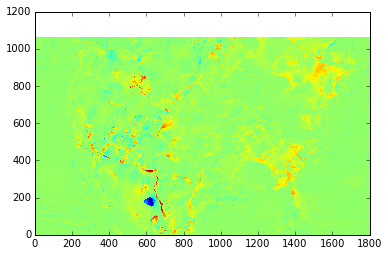

In [21]:
plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][0,0,:,:] \
               - hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][1,0,:,:])

In [8]:
print(hrrr_dap.ncattrs())

[u'Originating_or_generating_Center', u'Originating_or_generating_Subcenter', u'GRIB_table_version', u'Type_of_generating_process', u'file_format', u'Conventions', u'history', u'featureType', u'_CoordSysBuilder']


In [25]:
print(hrrr_dap.variables['LambertConformal_Projection'].ncattrs())

[u'grid_mapping_name', u'latitude_of_projection_origin', u'longitude_of_central_meridian', u'standard_parallel', u'earth_radius', u'_CoordinateTransformType', u'_CoordinateAxisTypes']


In [26]:
print(hrrr_dap.variables['x'].units)

km


In [27]:
def dap_lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)
 

In [28]:
lon, lat = dap_lat_lons(hrrr_dap)

In [29]:
d11, d12 =  (np.abs(lat[:,0]-40)).argmin(), (np.abs(lat[:,0]-45)).argmin()
d21, d22 =  (np.abs(lon[0,:]+90)).argmin(), (np.abs(lat[0,:]+85)).argmin()

bbox = [d11, d12, d21, d22] 

<matplotlib.colorbar.Colorbar instance at 0x107c2c248>

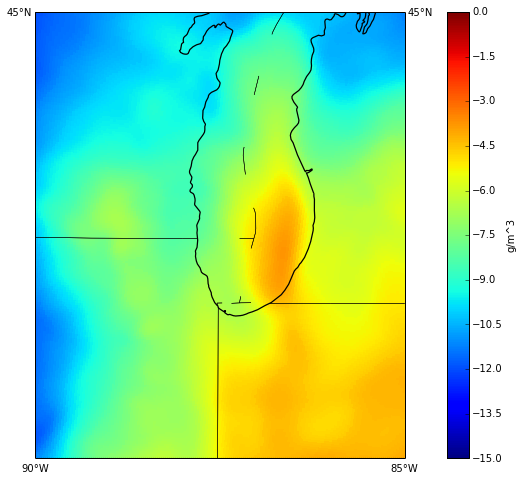

In [30]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -90,llcrnrlat = 40, urcrnrlon = -85,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
my_mesh = m.pcolormesh(x, y, 
                       hrrr_dap.variables['Temperature_isobaric'][0,0,:,:]-273.15,
                       vmin = -15, vmax = 0)
my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plt.colorbar(label='g/m^3')   

In [33]:
print x.shape

(1059, 1799)


In [34]:
def update(n, xx,yy,data,m, ax, bbox):
    plt.cla()
    my_mesh = m.pcolormesh( xx[bbox[0]:bbox[1],bbox[2]:bbox[3]], yy[bbox[0]:bbox[1],bbox[2]:bbox[3]], 
                       data.variables['Temperature_isobaric'][n,0,bbox[0]:bbox[1],bbox[2]:bbox[3]]-273.15,
                       vmin = -15, vmax = 0, ax = ax)
    my_coast = m.drawcoastlines(linewidth=1.25)
    my_states = m.drawstates()
    m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
    m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
    return my_mesh
    
    

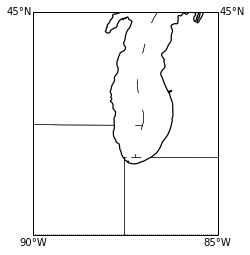

In [37]:
d11, d12 =  (np.abs(lat[:,0]-30)).argmin(), (np.abs(lat[:,0]-45)).argmin()
d21, d22 =  (np.abs(lon[0,:]+100)).argmin(), (np.abs(lat[0,:]+85)).argmin()

bbox = [d11, d12, d21, d22] 
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -90,llcrnrlat = 40, urcrnrlon = -85,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
this_ax = f.add_axes([0.1, 0.1, .9, .8])
pc = update(0, x,y,hrrr_dap, m, this_ax, bbox)
plt.colorbar(label='T(C)', mappable = pc)   
my_anim = animation.FuncAnimation( f, update, fargs = (x,y,hrrr_dap, m, this_ax, bbox), 
                                  frames = 5 )
display_animation(my_anim, default_mode='once')